In [1]:
print ("Hello")

Hello


In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv

# Set up ChromeDriver service
service = Service()
driver = webdriver.Chrome(service=service)

try:
    # Open the website
    driver.get("https://www.nse.co.ke/dataservices/market-statistics/")

    wait = WebDriverWait(driver, 60)

    # Locate and click the "Equity Statistics" tab
    equities_tab = wait.until(EC.element_to_be_clickable(
        (By.XPATH, '//a[span[text()="Equity Statistics"]]')
    ))
    equities_tab.click()

    # Wait for the table to load
    table = wait.until(EC.presence_of_element_located(
        (By.CSS_SELECTOR, "table.table.nsetable")
    ))

    # Wait for at least one row to have non-empty first cell (Company name)
    wait.until(lambda d: any(
        cell.text.strip() != "" for cell in d.find_elements(By.CSS_SELECTOR, "table.table.nsetable tbody tr td")
    ))

    # Open CSV file for writing
    with open("Share.csv", "w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow(["Company", "ISIN Code", "Volume", "Last Traded Price", "Change"])

        # Now fetch rows again after text has loaded
        rows = driver.find_elements(By.CSS_SELECTOR, "table.table.nsetable tbody tr")

        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")
            if len(cells) >= 5:
                company = cells[0].text.strip()
                isin_code = cells[1].text.strip()
                volume = cells[2].text.strip()
                last_traded_price = cells[3].text.strip()
                change = cells[4].text.strip()

                print(company, isin_code, volume, last_traded_price, change)  # Debug preview
                writer.writerow([company, isin_code, volume, last_traded_price, change])

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    driver.quit()


Kakuzi Ord.5.00 KE0000000281 12 388.5 0.00
Sasini Ltd Ord 1.00 KE0000000430 11336 18.1 -2.69
Eaagads Ltd Ord 1.25 KE0000000208 555 20.35 6.82
Williamson Tea Kenya Ltd Ord 5.00 KE0000000505 92 240 0.00
Kapchorua Tea Co. Ltd Ord Ord 5.00 KE4000001760 750 327 0.00
Limuru Tea Co. Ltd Ord 20.00 KE0000000356 0 310 0.00
    
    
    
    
    
    
    
    
    
    


In [28]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, WebDriverException, StaleElementReferenceException
import csv 
import time

def scrape_table(driver, writer, sector_name):
    """
    Scrapes the data from the visible table and writes it to the CSV file.
    """
    try:
        rows = driver.find_elements(By.CSS_SELECTOR, "table.table.nsetable tbody tr")
        
        if not rows:
            print(f"No data found for {sector_name}.")
            return
            
        for row in rows:
            try:
                cells = row.find_elements(By.TAG_NAME, "td")
                if len(cells) >= 5:
                    writer.writerow([
                        sector_name,
                        cells[0].text.strip(),
                        cells[1].text.strip(),
                        cells[2].text.strip(),
                        cells[3].text.strip(),
                        cells[4].text.strip()
                    ])
            except StaleElementReferenceException:
                continue
        print(f"Data for {sector_name} appended.")

    except Exception as e:
        print(f" An error occurred while scraping {sector_name}: {e}")

def main():
    """
    Main function to orchestrate the web scraping process.
    """
    driver = None
    try:
        service = Service()
        driver = webdriver.Chrome(service=service)
        print("ChromeDriver started successfully.")

        url = "https://www.nse.co.ke/market-statistics/"
        driver.get(url)
        wait = WebDriverWait(driver, 70)

        # Click the "Equity Statistics" tab
        equities_tab = wait.until(EC.element_to_be_clickable(
            (By.XPATH, '//a[span[text()="Equity Statistics"]]')))
        equities_tab.click()
        print("Equity Statistics tab clicked.")

        # Wait for the initial table to load
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "table.table.nsetable")))

        # Define all sectors based on the HTML provided
        sectors_map = {
            "agric": "AGRICULTURAL",
            "auto": "AUTOMOBILES",
            "bank": "BANKING",
            "comm": "COMMERCIAL ",
            "const": "CONSTRUCTION ",
            "energy": "ENERGY ",
            "insr": "INSURANCE",
            "invest": "INVESTMENT",
            "investse": "INVESTMENT SERVICES",
            "manu": "MANUFACTURING ",
            "tele":"TELECOMMUNICATION",
            "real": "REAL ESTATE ",
            "exchange": "ETF",
        }
        
        for sector_value, sector_name in sectors_map.items():
            if sector_name == "AGRICULTURAL":
              continue
        
        with open("equity_all_sectors.csv", "w", newline="", encoding="utf-8") as file:
            writer = csv.writer(file)
            writer.writerow(["Sector", "Company", "Share Code", "Volume", "Last Traded Price", "Change ($)"])

            # Loop through all sectors to select and scrape
            for sector_value, sector_name in sectors_map.items():
                print(f"\nProcessing sector: {sector_name}")
                
                # RE-LOCATE the dropdown inside the loop to avoid StaleElementReferenceException
                sector_dropdown = wait.until(EC.presence_of_element_located((By.ID, "filtersectors")))
                select = Select(sector_dropdown)
                
                # Select the current sector by its value
                select.select_by_value(sector_value)
                
                # Wait for the table to load new data before scraping
                wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "table.table.nsetable tbody tr td")))
                scrape_table(driver, writer, sector_name)
                
                # Pause to allow the page to fully update before the next iteration
                time.sleep(2)

    except (TimeoutException, WebDriverException) as e:
        print(f"\nAn error occurred: {e}")

    finally:
        if driver:
            driver.quit()
            print("\nWebDriver closed.")

if __name__ == "__main__":
    main()

ChromeDriver started successfully.
Equity Statistics tab clicked.

Processing sector: AGRICULTURAL
Data for AGRICULTURAL appended.

Processing sector: AUTOMOBILES
Data for AUTOMOBILES appended.

Processing sector: BANKING
Data for BANKING appended.

Processing sector: COMMERCIAL 
Data for COMMERCIAL  appended.

Processing sector: CONSTRUCTION 
Data for CONSTRUCTION  appended.

Processing sector: ENERGY 
Data for ENERGY  appended.

Processing sector: INSURANCE
Data for INSURANCE appended.

Processing sector: INVESTMENT
Data for INVESTMENT appended.

Processing sector: INVESTMENT SERVICES
Data for INVESTMENT SERVICES appended.

Processing sector: MANUFACTURING 
Data for MANUFACTURING  appended.

Processing sector: TELECOMMUNICATION
Data for TELECOMMUNICATION appended.

Processing sector: REAL ESTATE 
Data for REAL ESTATE  appended.

Processing sector: ETF
Data for ETF appended.

WebDriver closed.


ChromeDriver started successfully.
Equity Statistics tab clicked.

Processing sector: AGRICULTURAL
Data for AGRICULTURAL appended.

Processing sector: AUTOMOBILES
Data for AUTOMOBILES appended.

Processing sector: BANKING
Data for BANKING appended.

Processing sector: COMMERCIAL 
Data for COMMERCIAL  appended.

Processing sector: CONSTRUCTION 
Data for CONSTRUCTION  appended.

Processing sector: ENERGY 
Data for ENERGY  appended.

Processing sector: INSURANCE
Data for INSURANCE appended.

Processing sector: INVESTMENT
Data for INVESTMENT appended.

Processing sector: INVESTMENT SERVICES
Data for INVESTMENT SERVICES appended.

Processing sector: MANUFACTURING 
Data for MANUFACTURING  appended.

Processing sector: TELECOMMUNICATION
Data for TELECOMMUNICATION appended.

Processing sector: REAL ESTATE 
Data for REAL ESTATE  appended.

Processing sector: ETF
Data for ETF appended.

WebDriver closed.
Error during analysis: name 'np' is not defined


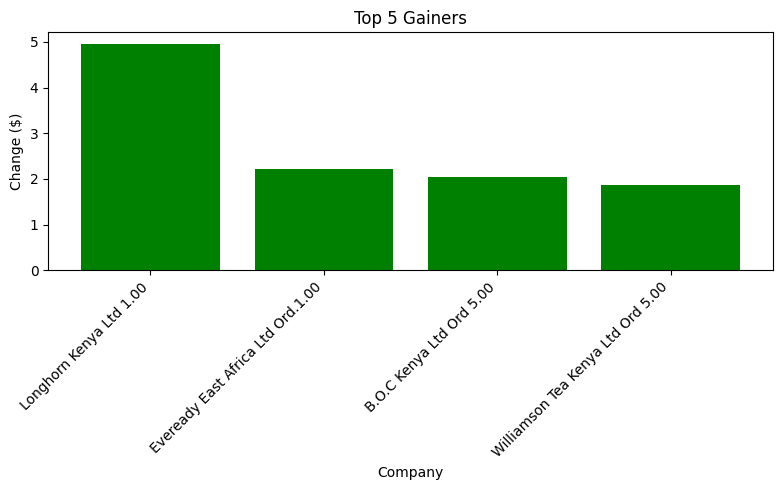

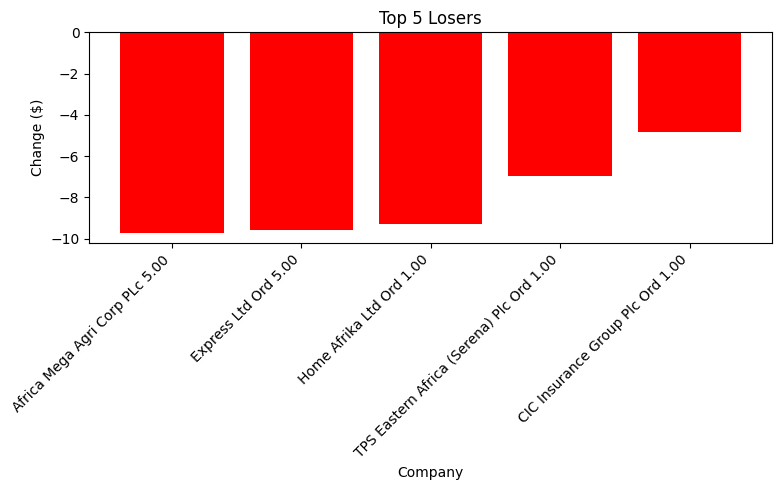

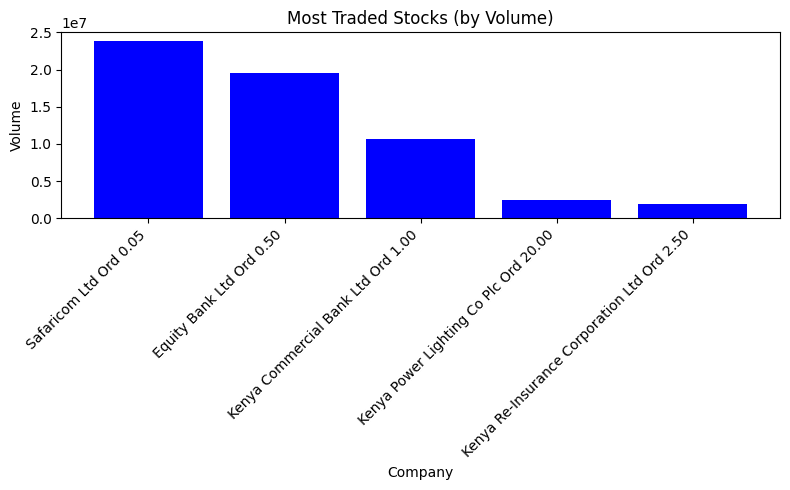

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, WebDriverException, StaleElementReferenceException
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt


def scrape_table(driver, writer, sector_name):
    """
    Scrapes the data from the visible table and writes it to the CSV file.
    """
    try:
        rows = driver.find_elements(By.CSS_SELECTOR, "table.table.nsetable tbody tr")
        
        if not rows:
            print(f"No data found for {sector_name}.")
            return
            
        for row in rows:
            try:
                cells = row.find_elements(By.TAG_NAME, "td")
                if len(cells) >= 5:
                    writer.writerow([
                        sector_name,
                        cells[0].text.strip(),
                        cells[1].text.strip(),
                        cells[2].text.strip(),
                        cells[3].text.strip(),
                        cells[4].text.strip()
                    ])
            except StaleElementReferenceException:
                continue
        print(f"Data for {sector_name} appended.")

    except Exception as e:
        print(f"An error occurred while scraping {sector_name}: {e}")

def analyze_stocks(csv_file="equity_all_sectors.csv"):
    """
    Reads scraped data, summarizes, and evaluates best probable stocks.
    """
    try:
        df = pd.read_csv(csv_file)

        # Clean numeric columns
        df["Volume"] = pd.to_numeric(df["Volume"], errors="coerce").fillna(0)
        df["Last Traded Price"] = pd.to_numeric(df["Last Traded Price"], errors="coerce").fillna(0)
        df["Change ($)"] = pd.to_numeric(df["Change ($)"], errors="coerce").fillna(0)

        # Summaries
        top_gainers = df.sort_values("Change ($)", ascending=False).head(5)
        top_losers = df.sort_values("Change ($)", ascending=True).head(5)
        most_traded = df.sort_values("Volume", ascending=False).head(5)

        # Simple Scoring System: Change × log(Volume+1)
        df["Score"] = df["Change ($)"] * np.log1p(df["Volume"])
        best_probable = df.sort_values("Score", ascending=False).head(5)

        print("\nTop 5 Gainers:")
        print(top_gainers[["Company", "Sector", "Change ($)", "Volume"]])

        print("\nTop 5 Losers:")
        print(top_losers[["Company", "Sector", "Change ($)", "Volume"]])

        print("\nMost Traded Stocks:")
        print(most_traded[["Company", "Sector", "Volume", "Last Traded Price"]])

        print("\nBest Probable Buys (Momentum + Liquidity):")
        print(best_probable[["Company", "Sector", "Change ($)", "Volume", "Score"]])

    except Exception as e:
        print(f"Error during analysis: {e}")
        
        # 1. Top Gainers Bar Chart
        plt.figure(figsize=(8, 5))
        plt.bar(top_gainers["Company"], top_gainers["Change ($)"], color="green")
        plt.title("Top 5 Gainers")
        plt.xlabel("Company")
        plt.ylabel("Change ($)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

        # 2. Top Losers Bar Chart
        plt.figure(figsize=(8, 5))
        plt.bar(top_losers["Company"], top_losers["Change ($)"], color="red")
        plt.title("Top 5 Losers")
        plt.xlabel("Company")
        plt.ylabel("Change ($)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

        # 3. Most Traded Volume Chart
        plt.figure(figsize=(8, 5))
        plt.bar(most_traded["Company"], most_traded["Volume"], color="blue")
        plt.title("Most Traded Stocks (by Volume)")
        plt.xlabel("Company")
        plt.ylabel("Volume")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error during analysis: {e}")

def main():
    """
    Main function to orchestrate the web scraping process.
    """
    driver = None
    try:
        service = Service()
        driver = webdriver.Chrome(service=service)
        print("ChromeDriver started successfully.")

        url = "https://www.nse.co.ke/market-statistics/"
        driver.get(url)
        wait = WebDriverWait(driver, 70)

        # Click the "Equity Statistics" tab
        equities_tab = wait.until(EC.element_to_be_clickable(
            (By.XPATH, '//a[span[text()="Equity Statistics"]]')))
        equities_tab.click()
        print("Equity Statistics tab clicked.")

        # Wait for the initial table to load
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "table.table.nsetable")))

        # Define all sectors
        sectors_map = {
            "agric": "AGRICULTURAL",
            "auto": "AUTOMOBILES",
            "bank": "BANKING",
            "comm": "COMMERCIAL ",
            "const": "CONSTRUCTION ",
            "energy": "ENERGY ",
            "insr": "INSURANCE",
            "invest": "INVESTMENT",
            "investse": "INVESTMENT SERVICES",
            "manu": "MANUFACTURING ",
            "tele": "TELECOMMUNICATION",
            "real": "REAL ESTATE ",
            "exchange": "ETF",
        }

        with open("equity_all_sectors.csv", "w", newline="", encoding="utf-8") as file:
            writer = csv.writer(file)
            writer.writerow(["Sector", "Company", "Share Code", "Volume", "Last Traded Price", "Change ($)"])

            # Loop through all sectors
            for sector_value, sector_name in sectors_map.items():
                if sector_value == "AGRICULTURAL":
                    continue

                print(f"\nProcessing sector: {sector_name}")
                
                # Re-locate dropdown each loop
                sector_dropdown = wait.until(EC.presence_of_element_located((By.ID, "filtersectors")))
                select = Select(sector_dropdown)
                select.select_by_value(sector_value)
                
                # Wait for updated table
                wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "table.table.nsetable tbody tr td")))
                scrape_table(driver, writer, sector_name)
                
                time.sleep(2)

    except (TimeoutException, WebDriverException) as e:
        print(f"\nAn error occurred: {e}")

    finally:
        if driver:
            driver.quit()
            print("\nWebDriver closed.")

        # Run analysis after scraping
        analyze_stocks("equity_all_sectors.csv")

if __name__ == "__main__":
    main()
